## Overview
You can use the function `ProcessBatch()` to process images in serial or the function `ParallelProcessBatch()` to process images in parallel. By default in both cases, you will calibrate the pre-processing step using the first image in the folder, so be sure that the first image is a good representative of the batch. For example, don't use an image that is crooked or has significant contamination. The auto-adjust option in preprocessing is sensitive to the initial guess, so using an outlier case as the initial guess for other images will not work well. If you are running these functions in the terminal, then you will want to set calibrate = False as you cannot display the images for interaction. Once calibrated, these functions loop through all the images in the input folder and save a segmented version as well as a .csv file in the output folder. The names of these output files are derived from the name of the input images. Batch processing also produces two log files: 
- BatchParameters.txt lists the parameters used to process the batch
- MissingImages.txt lists the names of images that were not processed

Just because an image was processed doesn't necessarily mean that it was processed correctly. The most common issues seem to occur if there is a cropping error or the pin size is not well estimated for the data set, so you likely want to try several test images individually before running a large batch. See the examples for an idea of one way to flag segmented images that likely have a cropping error. 
## Function Use
```
PyPl8.ProcessBatch(sourcefolder, outputfolder,   
             crop_method = 'Auto', adjust = True, rotate = False, crop_param = None, calibrate = True,
             s = 200, array_dimensions = (8,12), pin_size = 25, features = 'size', save = True, display = False)
                
PyPl8.ParallelProcessBatch(sourcefolder, outputfolder, numThreads = 2,   
                crop_method = 'Auto', adjust = True, rotate = False, crop_param = None, calibrate = True,
                s = 200, array_dimensions = (8,12), pin_size = 25, features = 'size', save = True, display = False)
                
```

#### Parameters
- **sourcefolder:** *string (required)* Path to folder containing images to be processed
- **outputfolder:** *string (required)* Path to desired location for function output to be saved. If the folder does not exist, it will be created during processing as long as it is a valid path. If you are using save = False, then you can provide a dummy variable like [] in place of a folder path. 
- **crop_method:** *string (optional)* There are 3 possible methods for pre-processing the images. The default value is `'Auto'`, which detects the agar plate by thresholding the whole image and then estimates pin locations based on the plate shape. This method generally works well when plates are placed parallel to the edges of the photo and the majority of patches have significant growth. It relies fairly heavily on the autoadjustment after initial guess, so if lots of patches are not growing well it fails because there is not a good reference point to adjust to. A second option is `'Grid'`, in which the user inputs the position of the center of patch A1 either through `crop_param` or upon viewing the image in the notebook. On a windows or mac operating system, you can also use the '`Click`' option, which will open the image in another window and you can click on the A1 location to provide the necessary reference point.
- **crop_param:** *tuple of integers (optional)* When using the `'Grid'` crop method you can enter an estimate of the location of the center of patch A1 in the form (row, column) instead of using the image display step. By default the value of crop_param is None and the image will instead be displayed inline and the corresponding info requested from the user.
- **s:** *integer (optional)* The side length of desired square regions of interest in pixels. The default value is 200 pixels.
- **array_dimensions:** *tuple of integers (optional)* The dimensions of the patch lay out on the plate in the form (number of rows, number of columns). The default value is (8,12). 
- **pin_size:** *integer (optional)* Estimated minimum patch radius, which corresponds to the radius of the pin used to place cells. The default value is 25, which is the lowest size that has fit experimental data from the Dudley lab. For the funnel cross data, a pin size of 28 was used. If you set pin_size = 0, then during the segmentation step, otsu thresholding alone will be used and circle detection will be skipped. 
- **features:** *string (optional)* The default value is `'size'`, which will extract the area, average pixel intensity, total pixel sum, and perimeter of each patch. If you want to additionally extract texture features, set `features = 'all'`.
- **adjust:** *boolean (optional)* The default value is True. When True, adjust will perform a preliminary segmentation of each ROI and shift it so that the ROI is centered on the largest object in that intial area. If an ROI does not contain any detectable objects at this initial pass, it will be recentered based on the mean change in other patches in that row and column. For tricky images with lots of null growth I suggest carefully calibrating the reference point for the `Grid` cropping option and setting `adjust = False`. 
- **rotate:** *boolean (optional)* The default value is `False`. When `True`, plate images will be rotated 180 degrees before being processed. 
- **calibrate:** *boolean (optional)* The default value is `True`. When `True`, the first image in the input folder will be segmented and displayed to the screen. Then the user is asked to enter 'y' if they wish to continue or 'n' if not. When `False`, this step will be skipped. 
- **save:** *boolean (optional)* The default value is `True`.  When `save = True`, these functions save the feature data frame to a .csv file and the segmented image to a .jpg file in the output folder. If you are testing out preprocessing settings, you may want to use save = False.
- **display:** *boolean (optional)* The default value is `False`. If `True`, segmented plate images will be displayed to the screen as they are constructed. This can slow down processing significantly, but when processed a small batch may be useful. It is only available for serial processing though, not parallel processing.

For parallel processing there is an additional optional keyword argument 
- **numThreads:** *integer (optional)* The default value is 2. You can set the number of threads to use when processing images in parallel. When testing a batch of 350 images, I found that using numThreads = 3-7 performed well and numThreads = 6 was the fastest.

#### Returns
None. There is no output from the batch processing functions to the workspace other than printing the names of the images to the screen as they are processed. ParallelProcessBatch also prints which thread each image is processed on. When save = True, these functions save a .csv and a segmented .jpg file for each image in the output folder. When display = True, the segmented images are displayed to the screen as they are created. 

## Examples

### Example 1: Process folder of images in serial with default preprocessing settings

YCR71P01_CHX_12-20-03.jpg


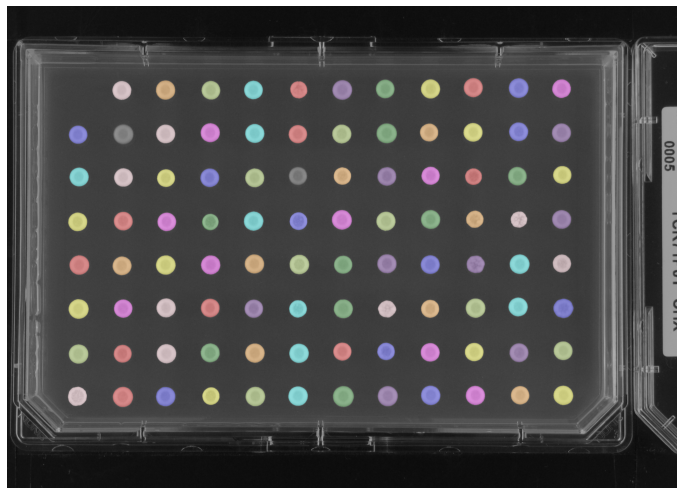

YCR71P01_GAL_24h_12-19-36.jpg


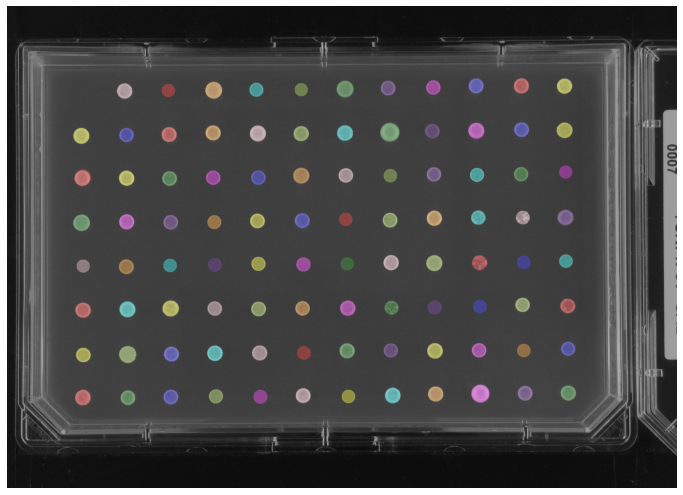

YCR71P01_CF_72h_11-27-34.jpg


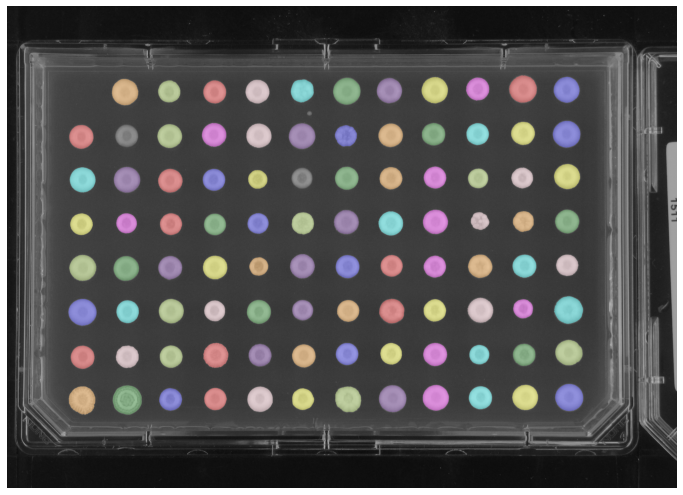

YCR71P06_HU_72h_11-43-18.jpg


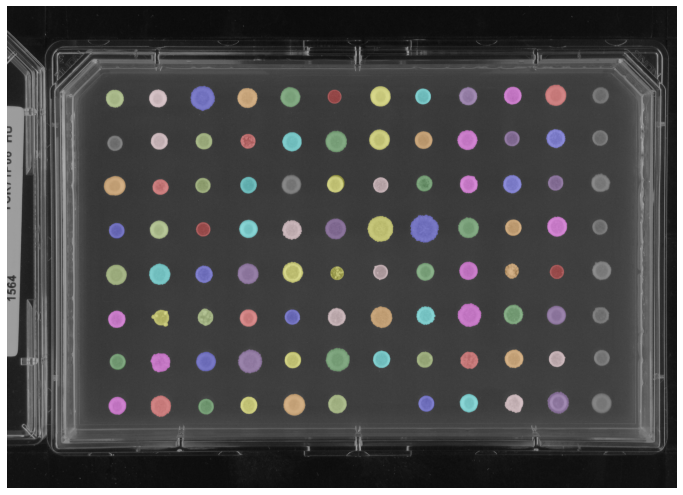

FC1_CAFF_24h_13-06-19.jpg


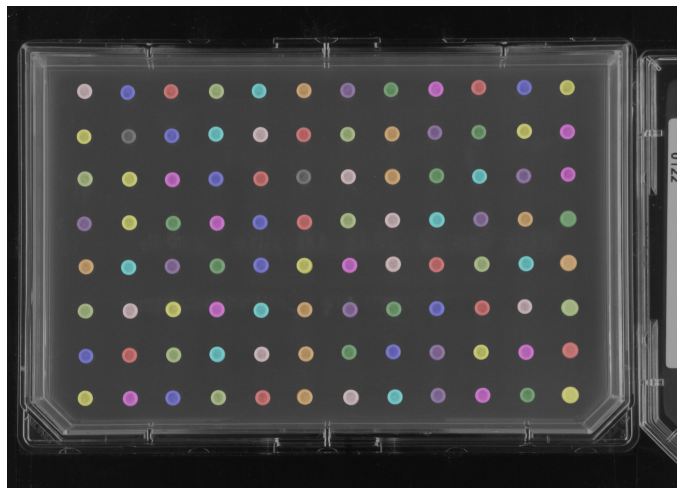

YCR71P01_CF_24h_12-20-45.jpg


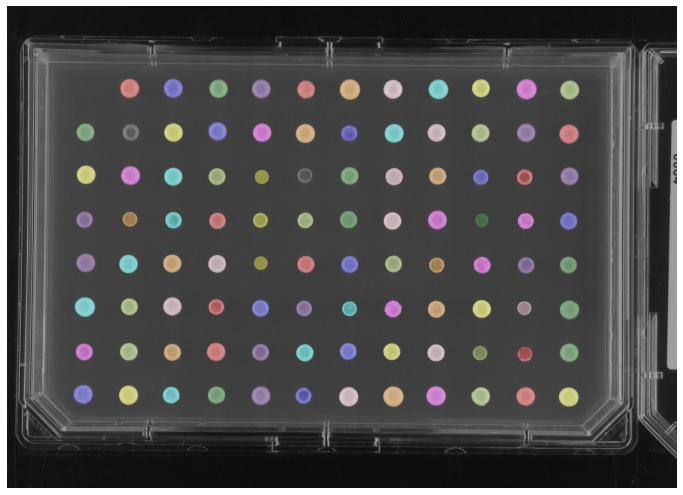

YCR71P01_CF_72h_11-27-34 (1).jpg


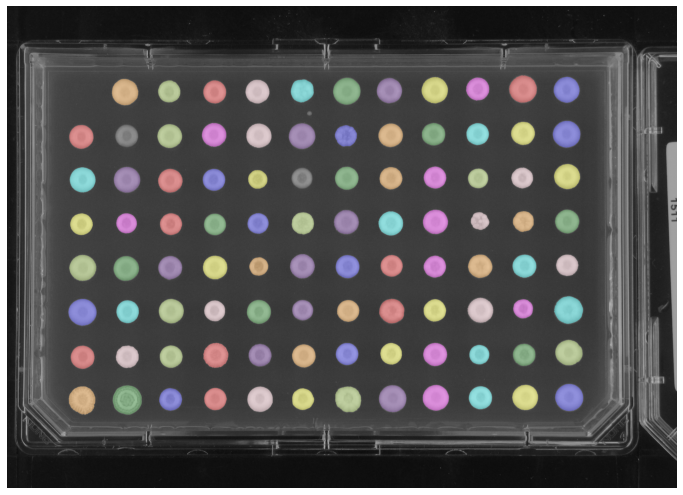

In [4]:
from PyPl8 import ProcessBatch

image_folder = '/home/jupyter-kowens/shared/ExampleImages'
output_folder = '/home/jupyter-kowens/shared/TestOutput'

ProcessBatch(image_folder, output_folder, pin_size = 32, display = True, save = False,crop_method = 'Grid', crop_param = (500, 500), calibrate = False)

### Example 2: Process folder of images in parallel with default settings
This time let's skip the calibration step since we already observed that the default 'Auto' crop method works well.

In [ ]:
from PyPl8 import ParallelProcessBatch
import time

image_folder = '/home/ExampleImages'
output_folder = '/home/TestOutput'

# -- we can time how long it takes to process with the time module
t0 = time.time()
ParallelProcessBatch(image_folder, output_folder, pin_size = 32, numThreads = 6, calibrate = False)
t1 = time.time()
print('total time: ', t1-t0)

### Example 3: Process images in parallel with the 'Grid' cropping option. Use reference point for A1 as input.

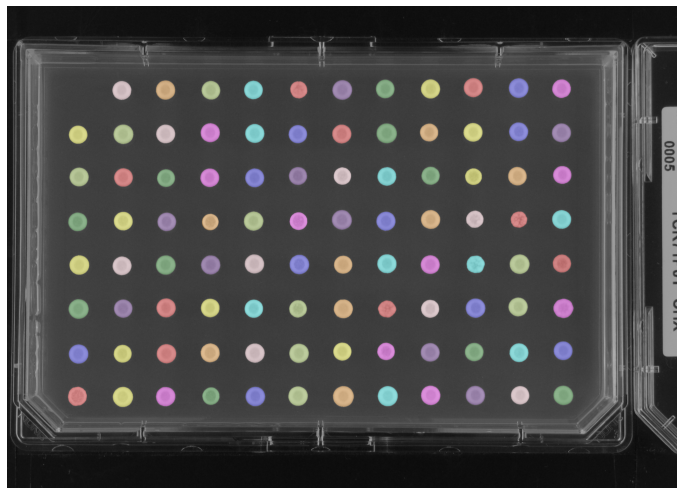

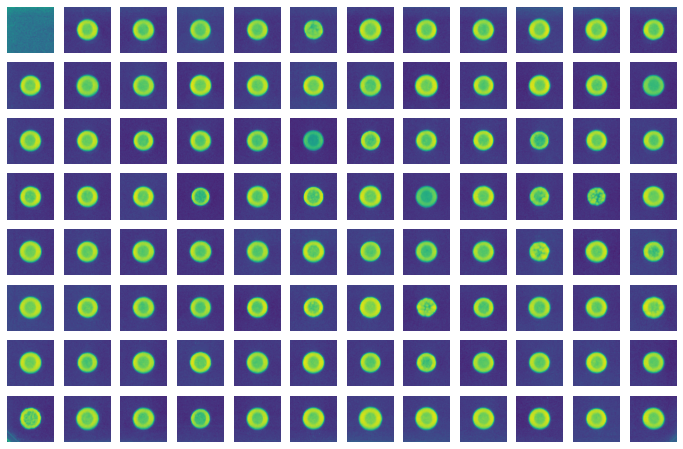

Would you like to proceed? y/ny
[Thread 0] Processing item 'YCR71P01_CHX_12-20-03.jpg'[Thread 1] Processing item 'YCR71P01_CF_72h_11-27-34.jpg'

[Thread 2] Processing item 'FC1_CAFF_24h_13-06-19.jpg'
[Thread 0] Processing item 'YCR71P01_GAL_24h_12-19-36.jpg'
[Thread 1] Processing item 'YCR71P06_HU_72h_11-43-18.jpg'
[Thread 2] Processing item 'YCR71P01_CF_24h_12-20-45.jpg'
[Thread 1] Processed '2' out of '2' images
[Thread 0] Processed '2' out of '2' images
[Thread 2] Processing item 'YCR71P01_CF_72h_11-27-34 (1).jpg'
[Thread 2] Processed '3' out of '3' images
total time:  39.36259317398071


In [1]:
from PyPl8 import ParallelProcessBatch
import time

image_folder = '/home/ExampleImages'
output_folder = '/home/TestOutput'

t0 = time.time()
ParallelProcessBatch(image_folder, output_folder, pin_size = 32, numThreads = 3, 
                     crop_method = 'Grid', crop_param = (600, 575))
t1 = time.time()
print('total time: ', t1-t0)

### Bonus: Flag images that finished processing but likely had a cropping error

One of these examples is upside down--this one does not crop properly.

In [ ]:
import os
import numpy as np
import pandas as pd

L_vals = [f for f in os.listdir(output_folder) if 'csv' in f]

flags = np.zeros(len(L_vals))
for i,f in enumerate(L_vals):
    res = pd.read_csv(os.path.join(output_folder,f))
    plate_areas = np.reshape(res.Area.values,(8,12))
    t1 = np.sum(plate_areas, 0) < 8000 # rows
    t2 = np.sum(plate_areas, 1) < 8000 # columns
    t3 = []
    for j in range(0,np.shape(plate_areas)[0]-2):
        for jj in range(0,np.shape(plate_areas)[1]-2):
            t3.append(np.sum(plate_areas[j:j+2,jj:jj+2].flatten()) < 3000) # 4 adjacent patches
    if any(t1):
        flags[i] = 1
    if any(t2):
        flags[i] = 1
    if any(t3):
        flags[i] = 1
crop_error_list = [L_vals[idx] for idx in np.where(flags>0)[0]]
crop_error_list

### Bonus: List images that failed to process

In [ ]:
segmented_images = [x.split('_seg')[0]+'.jpg' for x in os.listdir(output_folder) if '.jpg' in x ]
images = [x for x in os.listdir(image_folder) if '.jpg' in x]
missing_images = [item for item in images if item not in segmented_images]
missing_images